In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from PIL import Image
import neptune

# Load parameters

In [2]:
min_count = 5
bg_color = "white"

# Neptune setup

In [3]:
with open("api_key.txt") as f:
    neptune_key = f.read().rsplit()[0]
neptune.init('ferdzso05/sandbox', api_token=neptune_key)

Project(ferdzso05/sandbox)

In [4]:
neptune.create_experiment (
    name='wordcloud_example',
    params={"min_count":min_count, "bg_color":bg_color},
    upload_source_files=['wordcloud.ipynb']
)

NVMLError: NVML Shared Library Not Found - GPU usage metrics may not be reported.


https://ui.neptune.ai/ferdzso05/sandbox/e/SAN-10


Experiment(SAN-10)

# Define GitHub stars for tools

In [5]:
tools = {
    "nbdime":1800,
    "jupytext":3800,
    "nbclean":41,
    "nb-clean":15,
    "nbstripout":662,
    "cleanpy":1,
    "nbdev":1800,
    "nbval":309,
    "treon":252,
    "papermill":3500,
    "ipytest":122,
    "notebook":7506,
    "nbconvert":970,
    "nbviewer":171,
    "binderhub":1665,
    "luigi":13700,
    "airflow":18000,
    "neptune":38,
    "prefect":4700,
    "metaflow":3512,
    "mlflow":7200,
    "kubeflow":9300,
    "comet":54
}

In [6]:
text = ""
for key in tools:
    text += (key+" ") * int(min_count+np.log2(tools[key]))
text = " ".join(np.random.permutation(text.split()))

(-0.5, 399.5, 199.5, -0.5)

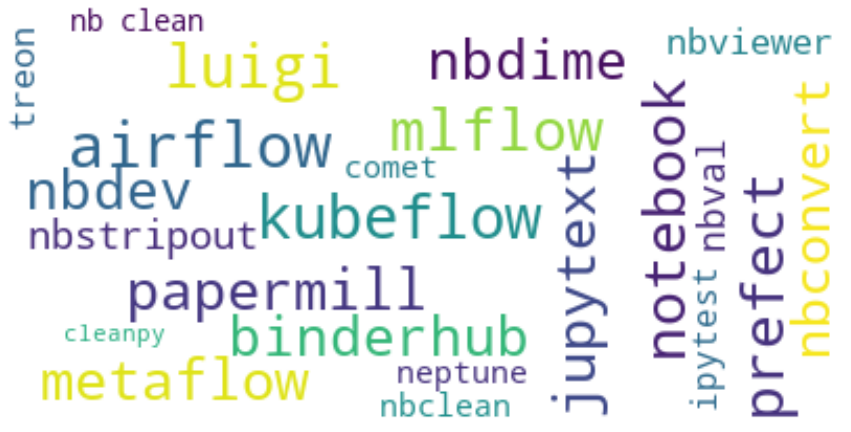

In [7]:
wordcloud = WordCloud(max_font_size=30, background_color=bg_color).generate(text)
fig, axs = plt.subplots(1, 1, figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()

In [8]:
neptune.log_image('tool_wordcloud', fig)